In [7]:
import sys
sys.path.append("C:\\Users\\BAOVIET\\OneDrive\\Máy tính\\Tai lieu hoc tap\\2024\\Animal-Detection-System-Using-CNN")

In [9]:
# Basic
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
from tqdm import tqdm
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [10]:
# parameters
image_size = 128
image_channel = 3
bat_size = 32

In [11]:
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,image_channel))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Bloack 1 
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers 
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,112,514 (19.50 MB)

 Trainable params: 5,110,530 (19.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [12]:
from contextlib import redirect_stdout
with open('model_summary.txt', 'w') as f:
    # Sử dụng redirect_stdout để ghi summary vào tệp văn bản
    with redirect_stdout(f):
        model.summary()

Model: "sequential_2"

+--------------------------------------------------------------------------+
| Layer (type)                    | Output Shape           |       Param # |
|---------------------------------+------------------------+---------------|
| conv2d_8 (Conv2D)               | (None, 126, 126, 32)   |           896 |
|---------------------------------+------------------------+---------------|
| batch_normalization_10          | (None, 126, 126, 32)   |           128 |
| (BatchNormalization)            |                        |               |
|---------------------------------+------------------------+---------------|
| max_pooling2d_8 (MaxPooling2D)  | (None, 63, 63, 32)     |             0 |
|---------------------------------+------------------------+---------------|
| dropout_10 (Dropout)            | (None, 63, 63, 32)     |             0 |
|---------------------------------+------------------------+---------------|
| conv2d_9 (Conv2D)               | (None, 61, 61, 64)     |        18,496 |
|---------------------------------+------------------------+---------------|
| batch_normalization_11          | (None, 61, 61, 64)     |           256 |
| (BatchNormalization)            |                        |               |
|---------------------------------+------------------------+---------------|
| max_pooling2d_9 (MaxPooling2D)  | (None, 30, 30, 64)     |             0 |
|---------------------------------+------------------------+---------------|
| dropout_11 (Dropout)            | (None, 30, 30, 64)     |             0 |
|---------------------------------+------------------------+---------------|
| conv2d_10 (Conv2D)              | (None, 28, 28, 128)    |        73,856 |
|---------------------------------+------------------------+---------------|
| batch_normalization_12          | (None, 28, 28, 128)    |           512 |
| (BatchNormalization)            |                        |               |
|---------------------------------+------------------------+---------------|
| max_pooling2d_10 (MaxPooling2D) | (None, 14, 14, 128)    |             0 |
|---------------------------------+------------------------+---------------|
| dropout_12 (Dropout)            | (None, 14, 14, 128)    |             0 |
|---------------------------------+------------------------+---------------|
| conv2d_11 (Conv2D)              | (None, 12, 12, 256)    |       295,168 |
|---------------------------------+------------------------+---------------|
| batch_normalization_13          | (None, 12, 12, 256)    |         1,024 |
| (BatchNormalization)            |                        |               |
|---------------------------------+------------------------+---------------|
| max_pooling2d_11 (MaxPooling2D) | (None, 6, 6, 256)      |             0 |
|---------------------------------+------------------------+---------------|
| dropout_13 (Dropout)            | (None, 6, 6, 256)      |             0 |
|---------------------------------+------------------------+---------------|
| flatten_2 (Flatten)             | (None, 9216)           |             0 |
|---------------------------------+------------------------+---------------|
| dense_4 (Dense)                 | (None, 512)            |     4,719,104 |
|---------------------------------+------------------------+---------------|
| batch_normalization_14          | (None, 512)            |         2,048 |
| (BatchNormalization)            |                        |               |
|---------------------------------+------------------------+---------------|
| dropout_14 (Dropout)            | (None, 512)            |             0 |
|---------------------------------+------------------------+---------------|
| dense_5 (Dense)                 | (None, 2)              |         1,026 |
+--------------------------------------------------------------------------+

 Total params: 5,112,514 (19.50 MB)

 Trainable params: 5,110,530 (19.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

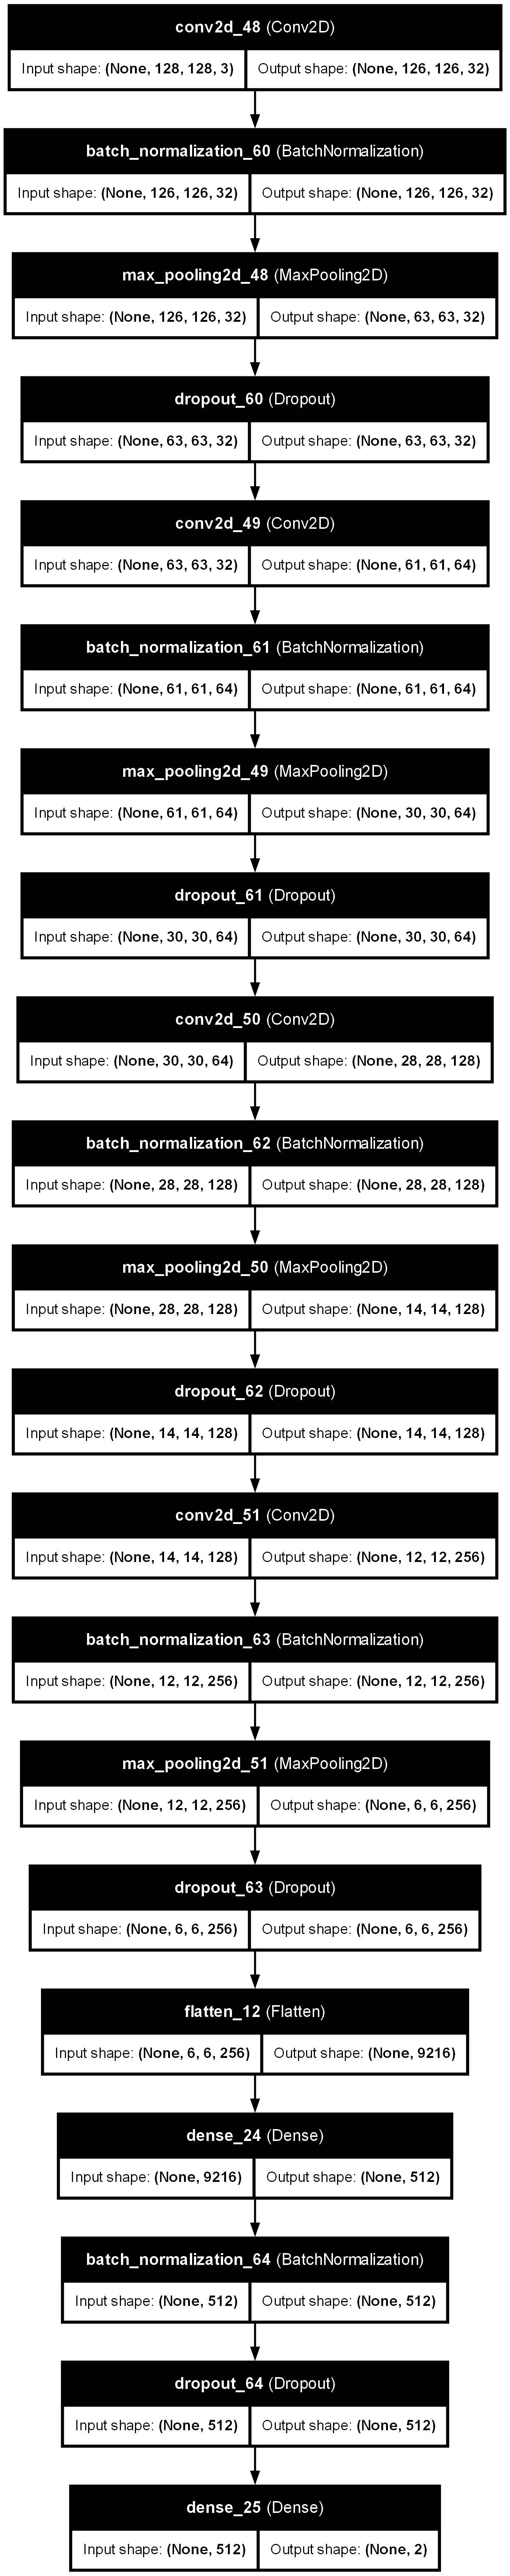

In [50]:
import pydot
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

Tôi sẽ phân tích chi tiết hơn từng phần của mô hình CNN này:

### 1. Lớp Convolutional:
Các lớp Convolutional (`Conv2D`) là nền tảng của mô hình CNN. Mỗi lớp sử dụng một bộ lọc (hoặc nhiều bộ lọc) có kích thước đã được chỉ định (trong trường hợp này là 3x3) để quét qua ảnh đầu vào hoặc bản đồ đặc trưng từ lớp trước, tạo ra một bản đồ đặc trưng mới. Bằng cách này, mô hình học được các đặc điểm từ dữ liệu đầu vào như cạnh, góc, mẫu, v.v.

- **Lớp `conv1`** sử dụng 32 bộ lọc để học các đặc trưng thấp cấp.
- **Lớp `conv2`**, **`conv3`**, và **`conv4`** có 64, 128, và 256 bộ lọc, tương ứng, cho phép mô hình học các đặc trưng cấp cao hơn và phức tạp hơn khi đi sâu vào mạng.

### 2. Batch Normalization:
Các lớp Batch Normalization (`BatchNormalization`) ứng dụng trước khi kích hoạt của mỗi lớp Convolutional nhằm giảm vấn đề internal covariate shift bằng cách chuẩn hóa đầu ra của mỗi lớp về một phân phối có trung bình là 0 và độ lệch chuẩn là 1. Điều này giúp ổn định và tăng tốc độ học của mô hình.

### 3. Max Pooling:
Các lớp Max Pooling (`MaxPooling2D`) giúp giảm kích thước không gian của bản đồ đặc trưng, giảm việc tính toán và giảm số lượng tham số. Lớp này tổng hợp giá trị lớn nhất trong một cửa sổ (2x2 trong trường hợp này) và dùng giá trị đó trong bản đồ đặc trưng tiếp theo. Điều này không chỉ cải thiện hiệu suất tính toán mà còn giúp mô hình bắt được các đặc điểm quan trọng bằng cách bỏ qua các chi tiết ít quan trọng.
### 4. Dropout:
Các lớp Dropout (`Dropout`) được thiết kế để chống overfitting bằng cách ngẫu nhiên "tắt" một số nơ-ron trong mô hình trong quá trình huấn luyện. Điều này khiến cho mô hình không thể phụ thuộc hoàn toàn vào bất kỳ đặc trưng đầu vào cụ thể nào, từ đó cải thiện khả năng tổng quát hóa của mô hình.

### 5. Flatten và Dense Layers:
Hoạt động `Flatten` chuyển đổi dữ liệu từ định dạng ma trận sang vector để các đặc trưng có thể được xử lý bằng các lớp Dense (Fully Connected Layers). Lớp `Dense` cuối cùng sử dụng hàm kích hoạt `softmax` để xuất ra xác suất cho mỗi lớp phân loại.

### Callbacks:
- **ReduceLROnPlateau**: Điều chỉnh tự động learning rate để cải thiện hiệu quả huấn luyện khi một hàm metrix nhất định (ví dụ: `val_accuracy`) không cải thiện.
- **EarlyStopping**: Dừng quá trình huấn luyện sớm khi không thấy cải thiện trong `val_loss`, giúp ngăn chặn việc overfitting và tiết kiệm thời gian.

Các phần trên khi kết hợp tạo ra một mô hình CNN mạnh m

In [13]:
import matplotlib.pyplot as plt
import json

with open("../new_history.json", "r") as j:
    history = json.load(j)

import matplotlib.pyplot as plt

# visualizing losses and accuracy
%matplotlib inline

train_loss = history['loss']
val_loss = history['val_loss']
train_acc = history['accuracy']
val_acc = history['val_accuracy']
epochs = range(len(train_acc))


<Figure size 640x480 with 0 Axes>

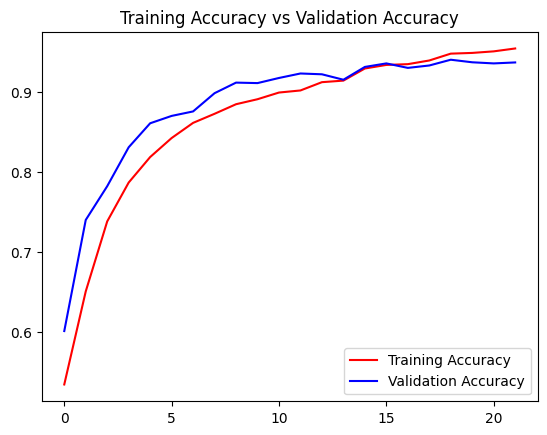

<Figure size 640x480 with 0 Axes>

In [14]:
plt.plot(epochs,train_acc,'r', label='Training Accuracy')
plt.plot(epochs,val_acc,'b', label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

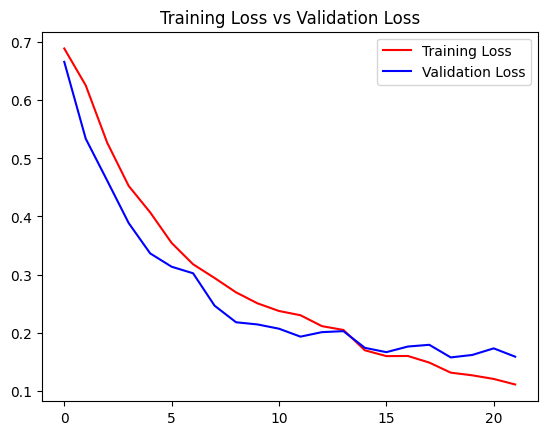

<Figure size 640x480 with 0 Axes>

In [15]:
plt.plot(epochs,train_loss,'r', label='Training Loss')
plt.plot(epochs,val_loss,'b', label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.figure()

In [17]:
from sources.model import data

In [19]:
training_dir = "../data/train/"
dt = data.Data(training_dir)
df = dt.data
labels = df['label']

In [21]:
df

,filename,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat
...,...,...
24995,dog.9995.jpg,dog
24996,dog.9996.jpg,dog
24997,dog.9997.jpg,dog
24998,dog.9998.jpg,dog


In [22]:
d = 0
c = 0
for l in labels:
    if l == "cat": c+=1
    else: d+=1
print(f"Cat = {c}, Dog = {d}")

Cat = 12500, Dog = 12500
